In [1]:
import pandas as pd
!pip3 install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

from seaborn import boxplot, kdeplot, set_style, distplot, countplot
from matplotlib.pyplot import show, figure, subplots, ylabel, xlabel, subplot, suptitle

You should consider upgrading via the 'pip install --upgrade pip' command.


Statistical test for correlation
1. One-Sample T-Test (Measuring Satisfaction Level)

- A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

2. Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and the entire employee population?

- Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and the entire employee population.

- Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and the entire employee population.

What are common characteristics of employees lost in attrition compared to those who stay in IBM's fictional dataset?

I am using point plots, box plots, kernel density diagrams, means, standard deviations, and z-tests to explore this question.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/lmei33/Discussion2/master/IBM_HR.csv")
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
target = "Attrition"

In [4]:
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()

dict_keys(['int64', 'object'])

In [5]:
objects = feature_by_dtype ["object"]

In [6]:
remove = ["Over18"]

In [7]:
categorical_features = [f for f in objects if f not in remove]

In [8]:
int64s = feature_by_dtype ["int64"]

In [9]:
remove.append("StandardHours")
remove.append("EmployeeCount")

In [10]:
count_features = []
for i in [i for i in int64s if len(data[i].unique()) < 20 and i not in remove]:
    count_features.append(i)

In [11]:
count_features = count_features #+ ["TotalWorkingYears", "YearsAtCompany", "HourlyRate"]

In [12]:
remove.append("EmployeeNumber")

In [13]:
numerical_features = [i for i in int64s if i not in remove]

In [14]:
#Numerical Features
data[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [15]:
def display_ttest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from scipy.stats import ttest_ind
    t, p = ttest_ind(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"t-test statistic" : t, "p-value" : p}], columns=["t-test statistic", "p-value"], index=[category]).round(2))

def display_ztest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from statsmodels.stats.weightstats import ztest
    z, p = ztest(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"z-test statistic" : z, "p-value" : p}], columns=["z-test statistic", "p-value"], index=[category]).round(2))
    
def display_cxn_analysis(data, category, numeric, target):
    
    not_target = [a for a in data[category].unique() if a != target][0]
    
    pal = {target : "yellow",
          not_target : "darkgrey"}
    

    set_style("whitegrid")
    figure(figsize=(12,5))
    suptitle(numeric + " by " + category)

    # ==============================================
    
    p1 = subplot(2,2,2)
    boxplot(y=category, x=numeric, data=data, orient="h", palette = pal)
    p1.get_xaxis().set_visible(False)

    # ==============================================
    
    if(numeric in count_features):
        p2 = subplot(2,2,4)
        
        s2 = data[data[category] == not_target][numeric]
        s2 = s2.rename(not_target) 
        countplot(s2, color = pal[not_target])
        
        s1 = data[data[category] == target][numeric]
        s1 = s1.rename(target)
        ax = countplot(s1, color = pal[target])
        
        ax.set_yticklabels([ "{:.0f}%".format((tick/len(data)) * 100) for tick in ax.get_yticks()])
        
        ax.set_ylabel("Percentage")
        ax.set_xlabel(numeric)
        
    else:
        p2 = subplot(2,2,4, sharex=p1)
        s1 = data[data[category] == target][numeric]
        s1 = s1.rename(target)
        kdeplot(s1, shade=True, color = pal[target])
        #distplot(s1,kde=False,color = pal[target])

        s2 = data[data[category] == not_target][numeric]
        s2 = s2.rename(not_target)  
        kdeplot(s2, shade=True, color = pal[not_target])
        #distplot(s2,kde=False,color = pal[not_target])

        #ylabel("Density Function")
        ylabel("Distribution Plot")
        xlabel(numeric)
    
    # ==============================================
    
    p3 = subplot(1,2,1)
    from seaborn import pointplot
    from matplotlib.pyplot import rc_context

    with rc_context({'lines.linewidth': 0.8}):
        pp = pointplot(x=category, y=numeric, data=data, capsize=.1, color="black", marker="s")
        
    
    # ==============================================
    
    show()
    
    #display p value
    
    if(data[category].value_counts()[0] > 30 and data[category].value_counts()[1] > 30):
        display_ztest(data,category,numeric)
    else:
        display_ttest(data,category,numeric)
    
    #Means, Standard Deviation, Absolute Distance
    table = data[[category,numeric]]
    
    means = table.groupby(category).mean()
    stds = table.groupby(category).std()
    
    s1_mean = means.loc[data[category].unique()[0]]
    s1_std = stds.loc[data[category].unique()[0]]
    
    s2_mean = means.loc[data[category].unique()[1]]
    s2_std = means.loc[data[category].unique()[1]]
    
    print("%s Mean: %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[0]),s1_mean, s1_std))
    print("%s Mean : %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[1]), s2_mean, s2_std))
    print("Absolute Mean Diferrence Distance: %.2f" % abs(s1_mean - s2_mean))

In [16]:
def get_p_value(s1,s2):
    
    from statsmodels.stats.weightstats import ztest
    from scipy.stats import ttest_ind
    
    if(len(s1) > 30 & len(s2) > 30):
        z, p = ztest(s1,s2)
        return p
    else:
        t, p = ttest_ind(s1,s2)
        return p
    
def get_p_values(data, category, numerics):
    
    output = {}
    
    for numeric in numerics:
        s1 = data[data[category] == data[category].unique()[0]][numeric]
        s2 = data[data[category] == data[category].unique()[1]][numeric]
        row = {"p-value" : get_p_value(s1,s2)}
        output[numeric] = row
    
    from pandas import DataFrame
    
    return DataFrame(data=output).T

def get_statistically_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] < 0.05].index)

def get_statistically_non_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] >= 0.05].index)
    
def display_p_values(data, category, numerics):
    from IPython.display import display
    display(get_p_values(data, category, numerics).round(2).sort_values("p-value", ascending=False))



In [17]:
significant = get_statistically_significant_numerics(data,target,numerical_features) 
ns = get_statistically_non_significant_numerics(data,target,numerical_features)

In [18]:
#Statistically Significant Numerical Features
i = iter(significant)

1. The fictional company on average loses staff that are 3 - 4 years younger than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


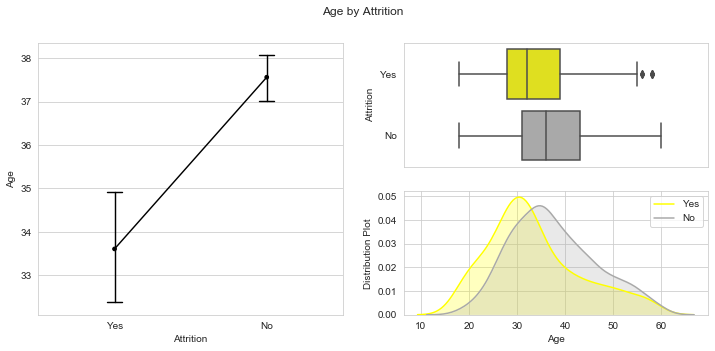

,z-test statistic,p-value
Attrition,-6.18,0.0


Attrition == Yes Mean: 33.61 (+/- 9.69)
Attrition == No Mean : 37.56 (+/- 37.56)
Absolute Mean Diferrence Distance: 3.95


In [19]:
display_cxn_analysis(data, target, next(i), "Yes")

2.  Employees lost in attrition tend to have lower daily rates than those who stay.
Each of the group are 180 degrees flipped from each other in their kernel density diagram

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


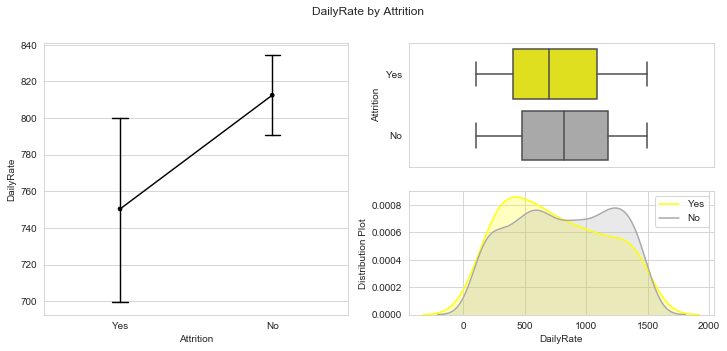

,z-test statistic,p-value
Attrition,-2.17,0.03


Attrition == Yes Mean: 750.36 (+/- 401.90)
Attrition == No Mean : 812.50 (+/- 812.50)
Absolute Mean Diferrence Distance: 62.14


In [20]:
display_cxn_analysis(data, target, next(i), "Yes")

3. Employees lost in attrition tend to have longer commute distances than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


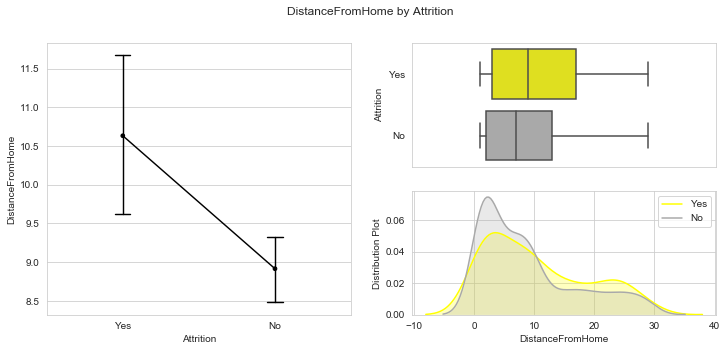

,z-test statistic,p-value
Attrition,2.99,0.0


Attrition == Yes Mean: 10.63 (+/- 8.45)
Attrition == No Mean : 8.92 (+/- 8.92)
Absolute Mean Diferrence Distance: 1.72


In [21]:
display_cxn_analysis(data, target, next(i), "Yes")

4. Employees lost in attrition are less satisfied with their work environment on average than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


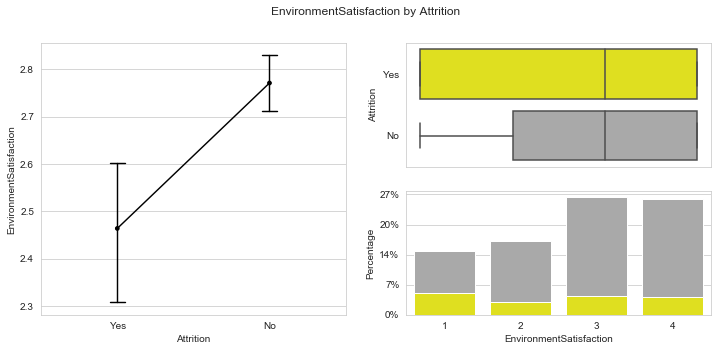

,z-test statistic,p-value
Attrition,-3.98,0.0


Attrition == Yes Mean: 2.46 (+/- 1.17)
Attrition == No Mean : 2.77 (+/- 2.77)
Absolute Mean Diferrence Distance: 0.31


In [22]:
display_cxn_analysis(data, target, next(i), "Yes")

5.  Employees lost in attrition are less involved with their jobs on average than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


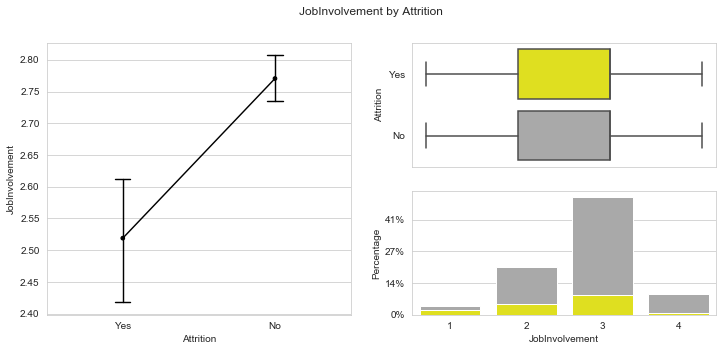

,z-test statistic,p-value
Attrition,-5.02,0.0


Attrition == Yes Mean: 2.52 (+/- 0.77)
Attrition == No Mean : 2.77 (+/- 2.77)
Absolute Mean Diferrence Distance: 0.25


In [23]:
display_cxn_analysis(data, target, next(i), "Yes")

6. Employees lost in attrition tend to be lower in job level than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


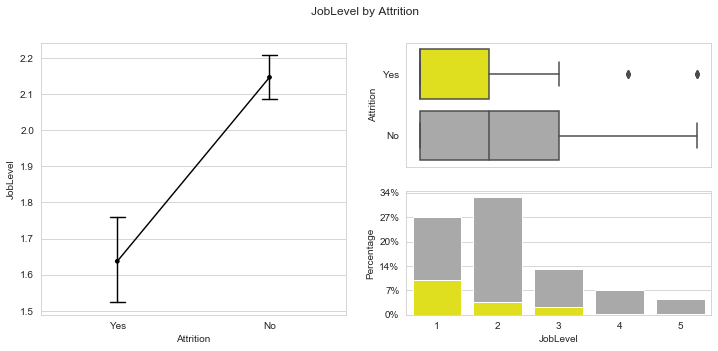

,z-test statistic,p-value
Attrition,-6.57,0.0


Attrition == Yes Mean: 1.64 (+/- 0.94)
Attrition == No Mean : 2.15 (+/- 2.15)
Absolute Mean Diferrence Distance: 0.51


In [24]:
display_cxn_analysis(data, target, next(i), "Yes")

7. Employees who stay have more job satisfication than employees lost in attrition

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


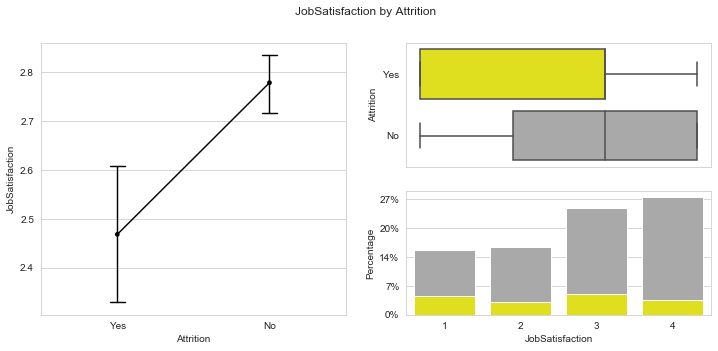

,z-test statistic,p-value
Attrition,-3.99,0.0


Attrition == Yes Mean: 2.47 (+/- 1.12)
Attrition == No Mean : 2.78 (+/- 2.78)
Absolute Mean Diferrence Distance: 0.31


In [25]:
display_cxn_analysis(data, target, next(i), "Yes")

8. Employees lost in attrition tend to have lower monthly average income on average than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


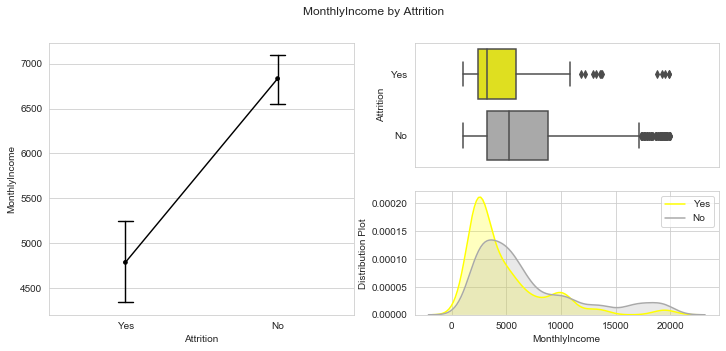

,z-test statistic,p-value
Attrition,-6.2,0.0


Attrition == Yes Mean: 4787.09 (+/- 3640.21)
Attrition == No Mean : 6832.74 (+/- 6832.74)
Absolute Mean Diferrence Distance: 2045.65


In [26]:
display_cxn_analysis(data, target, next(i), "Yes")

9. Employees who stay tend to have more stock options than those lost in attrition.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


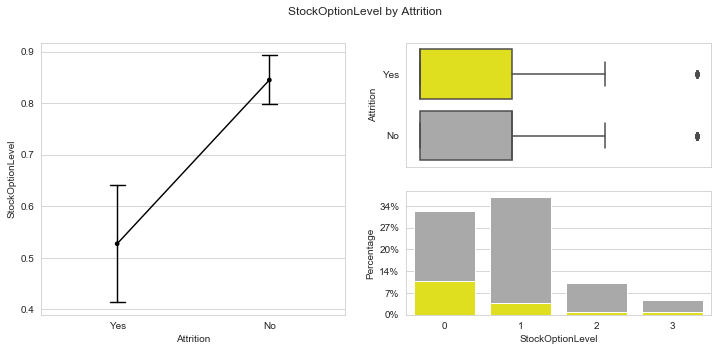

,z-test statistic,p-value
Attrition,-5.3,0.0


Attrition == Yes Mean: 0.53 (+/- 0.86)
Attrition == No Mean : 0.85 (+/- 0.85)
Absolute Mean Diferrence Distance: 0.32


In [27]:
display_cxn_analysis(data, target, next(i), "Yes")

10. Employees lost in attrition had less total working years than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


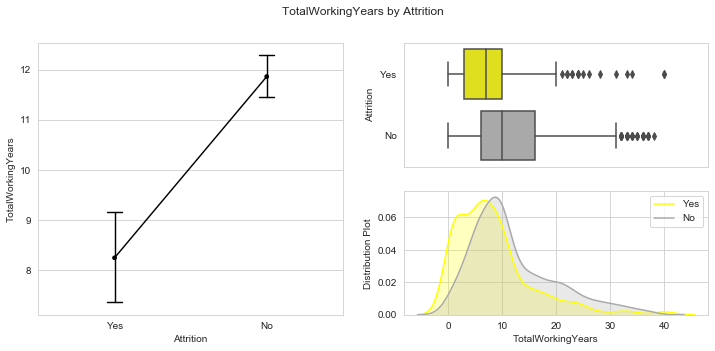

,z-test statistic,p-value
Attrition,-6.65,0.0


Attrition == Yes Mean: 8.24 (+/- 7.17)
Attrition == No Mean : 11.86 (+/- 11.86)
Absolute Mean Diferrence Distance: 3.62


In [28]:
display_cxn_analysis(data, target, next(i), "Yes")

11. Employees lost in attrition had less training opportunities than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


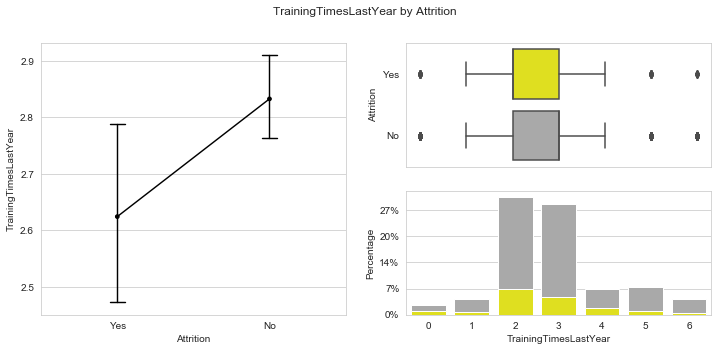

,z-test statistic,p-value
Attrition,-2.28,0.02


Attrition == Yes Mean: 2.62 (+/- 1.25)
Attrition == No Mean : 2.83 (+/- 2.83)
Absolute Mean Diferrence Distance: 0.21


In [29]:
display_cxn_analysis(data, target, next(i), "Yes")

12. Employees lost in attrition had poorer work-life balance on average than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


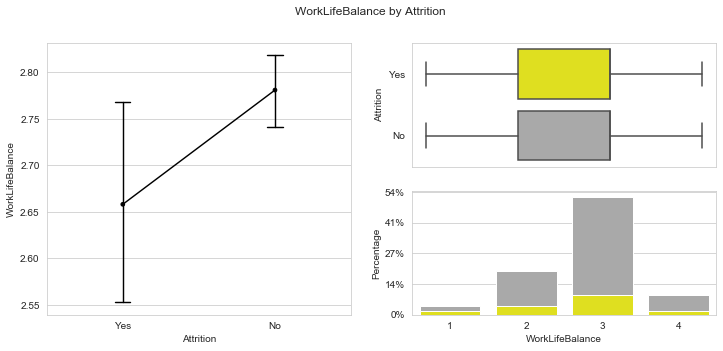

,z-test statistic,p-value
Attrition,-2.45,0.01


Attrition == Yes Mean: 2.66 (+/- 0.82)
Attrition == No Mean : 2.78 (+/- 2.78)
Absolute Mean Diferrence Distance: 0.12


In [30]:
display_cxn_analysis(data, target, next(i), "Yes")

13. Employees who stay had longer organization tenure than those lost in attrition by 2 years on average.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


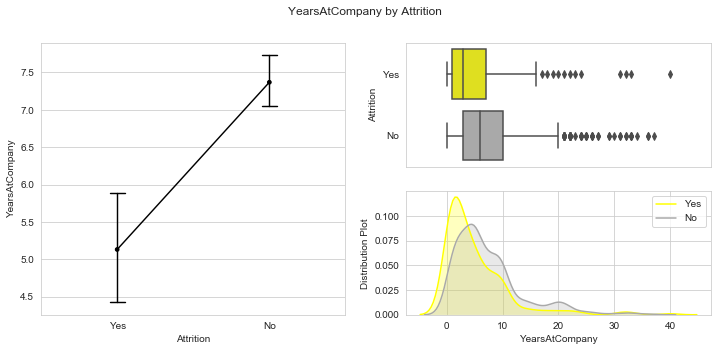

,z-test statistic,p-value
Attrition,-5.2,0.0


Attrition == Yes Mean: 5.13 (+/- 5.95)
Attrition == No Mean : 7.37 (+/- 7.37)
Absolute Mean Diferrence Distance: 2.24


In [31]:
display_cxn_analysis(data, target, next(i), "Yes")

14. Employees who stayed had 1 - 2 more years in their current role than those lost in attrition.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


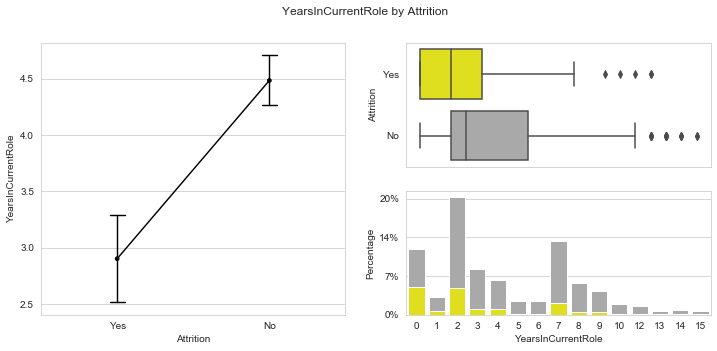

,z-test statistic,p-value
Attrition,-6.23,0.0


Attrition == Yes Mean: 2.90 (+/- 3.17)
Attrition == No Mean : 4.48 (+/- 4.48)
Absolute Mean Diferrence Distance: 1.58


In [32]:
display_cxn_analysis(data, target, next(i), "Yes")

15. Employees lost in attrition had less time with their current manager by 1 - 2 years on average than those who stay.

/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


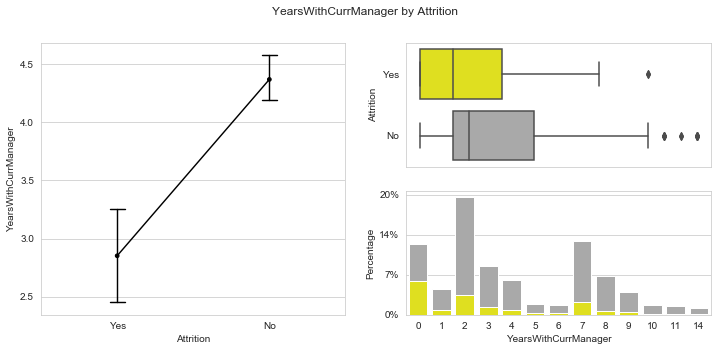

,z-test statistic,p-value
Attrition,-6.06,0.0


Attrition == Yes Mean: 2.85 (+/- 3.14)
Attrition == No Mean : 4.37 (+/- 4.37)
Absolute Mean Diferrence Distance: 1.52


In [33]:
display_cxn_analysis(data, target, next(i), "Yes")

Conclusion:
- Employees who stay are more satisfied with their work environment on average than those who leave.
- See if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population.


Non-Significant Features

Education


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


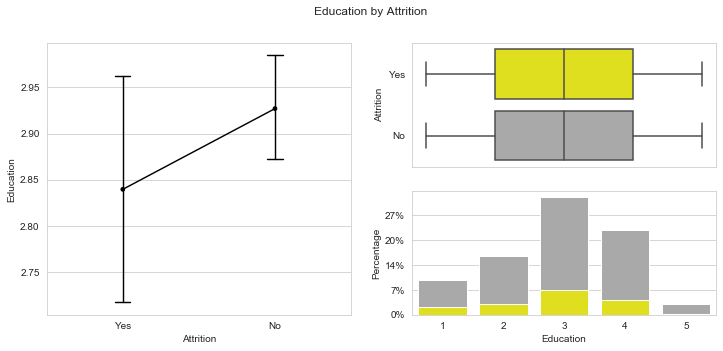

,z-test statistic,p-value
Attrition,-1.2,0.23


Attrition == Yes Mean: 2.84 (+/- 1.01)
Attrition == No Mean : 2.93 (+/- 2.93)
Absolute Mean Diferrence Distance: 0.09
HourlyRate


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


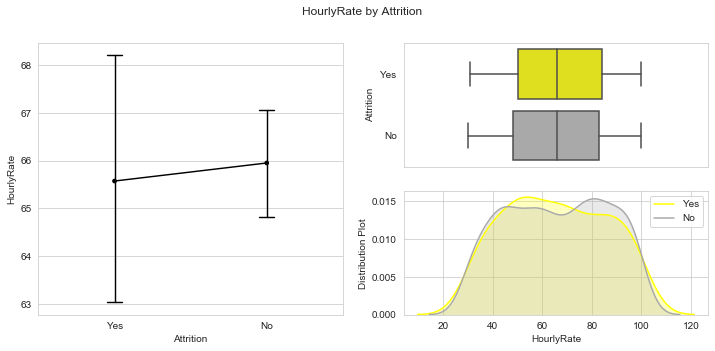

,z-test statistic,p-value
Attrition,-0.26,0.79


Attrition == Yes Mean: 65.57 (+/- 20.10)
Attrition == No Mean : 65.95 (+/- 65.95)
Absolute Mean Diferrence Distance: 0.38
MonthlyRate


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


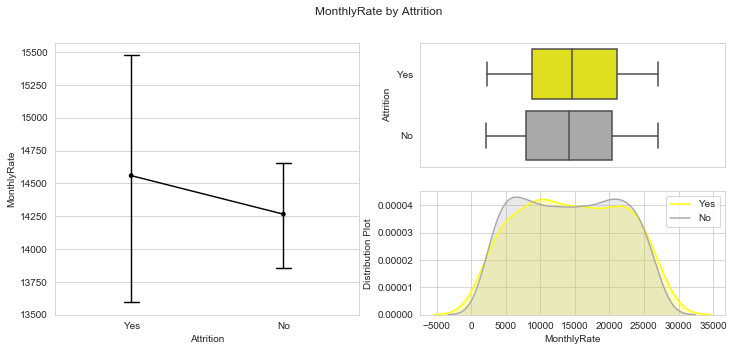

,z-test statistic,p-value
Attrition,0.58,0.56


Attrition == Yes Mean: 14559.31 (+/- 7208.15)
Attrition == No Mean : 14265.78 (+/- 14265.78)
Absolute Mean Diferrence Distance: 293.53
NumCompaniesWorked


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


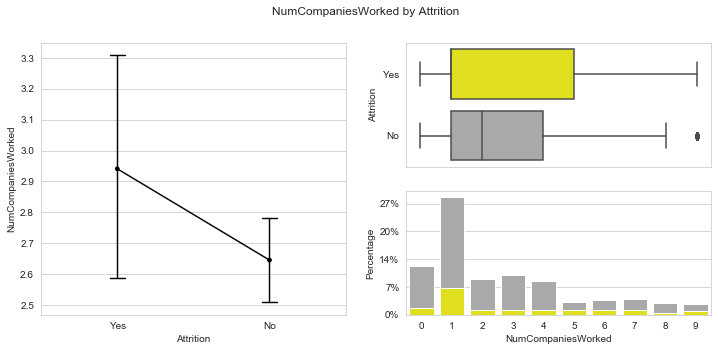

,z-test statistic,p-value
Attrition,1.67,0.1


Attrition == Yes Mean: 2.94 (+/- 2.68)
Attrition == No Mean : 2.65 (+/- 2.65)
Absolute Mean Diferrence Distance: 0.30
PercentSalaryHike


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


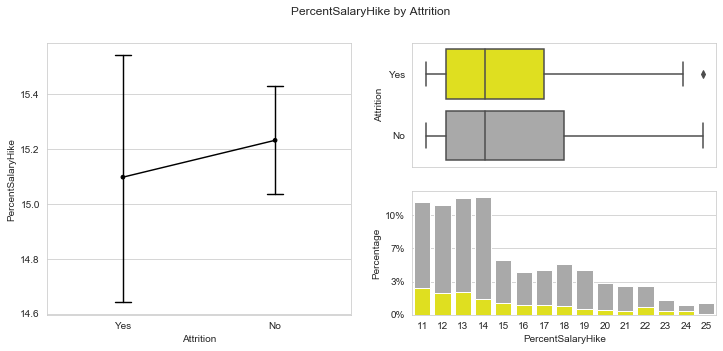

,z-test statistic,p-value
Attrition,-0.52,0.61


Attrition == Yes Mean: 15.10 (+/- 3.77)
Attrition == No Mean : 15.23 (+/- 15.23)
Absolute Mean Diferrence Distance: 0.13
PerformanceRating


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


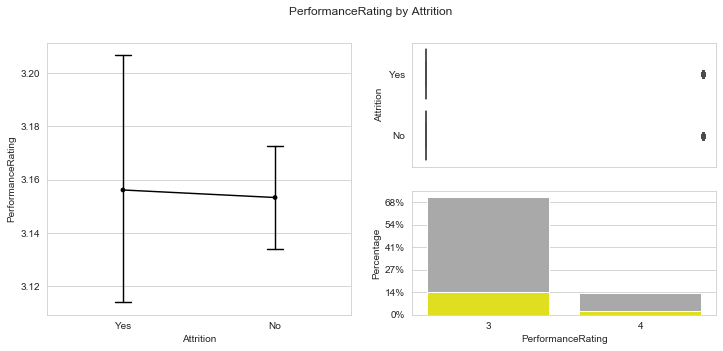

,z-test statistic,p-value
Attrition,0.11,0.91


Attrition == Yes Mean: 3.16 (+/- 0.36)
Attrition == No Mean : 3.15 (+/- 3.15)
Absolute Mean Diferrence Distance: 0.00
RelationshipSatisfaction


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


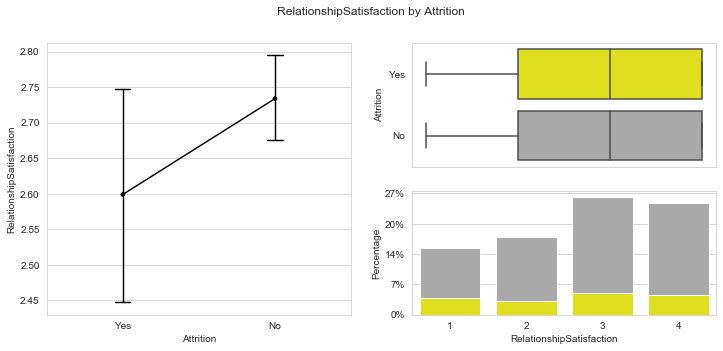

,z-test statistic,p-value
Attrition,-1.76,0.08


Attrition == Yes Mean: 2.60 (+/- 1.13)
Attrition == No Mean : 2.73 (+/- 2.73)
Absolute Mean Diferrence Distance: 0.13
YearsSinceLastPromotion


/Users/nguyetvo/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


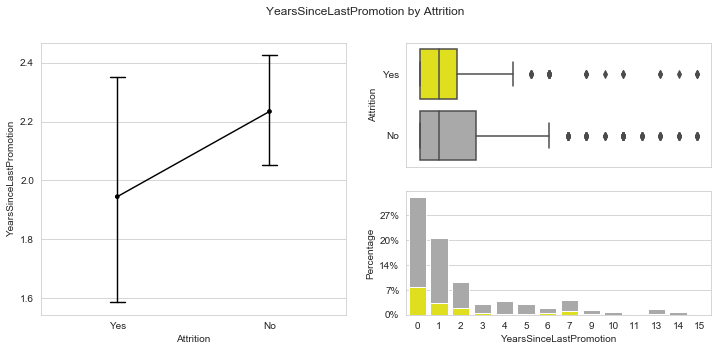

,z-test statistic,p-value
Attrition,-1.27,0.21


Attrition == Yes Mean: 1.95 (+/- 3.15)
Attrition == No Mean : 2.23 (+/- 2.23)
Absolute Mean Diferrence Distance: 0.29


In [34]:
for n in ns:
    print (n)
    
    display_cxn_analysis (data, target, n, "Yes")